<a href="https://colab.research.google.com/github/johnatandin/curso-one/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)


# Concatenando os dataframes
lojas =pd.concat([loja, loja2, loja3, loja4])



,Preço,Frete,Avaliação da compra,Quantidade de parcelas,lat,lon
count,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000
mean,622.309570,33.167002,4.014520,2.927398,-20.534059,-47.171176
std,787.094508,41.973711,1.390518,2.802776,5.399153,4.177887
min,10.070000,0.000000,1.000000,1.000000,-30.170000,-70.550000
25%,73.610000,4.009423,3.000000,1.000000,-22.250000,-48.790000
50%,295.350000,15.648481,5.000000,1.000000,-22.190000,-48.790000
75%,884.405000,46.591030,5.000000,4.000000,-18.100000,-44.380000
max,3969.380000,216.707633,5.000000,24.000000,1.990000,-36.590000


#1. Análise do faturamento


In [ ]:


# Calculando o faturamento total por dia, incluindo o frete
faturamento_diario = lojas.groupby('Data da Compra')[['Preço', 'Frete']].sum()

# Exibindo o faturamento diário
print(faturamento_diario)

valor_total_por_dia = faturamento_diario['Preço'] + faturamento_diario['Frete']
print(valor_total_por_dia)

faturamento_diario['faturamento_total'] = faturamento_diario['Preço'] + faturamento_diario['Frete']

print()


                  Preço       Frete
Data da Compra                     
01/01/2020      2322.25  122.151621
01/01/2021      2521.72  138.239879
01/01/2022      5352.95  287.207229
01/01/2023      2898.58  161.700541
01/02/2020      2290.01  120.086834
...                 ...         ...
31/10/2021      1982.52  106.109225
31/10/2022      4511.67  241.213763
31/12/2020      3036.64  162.688406
31/12/2021      5861.39  309.085318
31/12/2022      3978.31  203.055799

[1185 rows x 2 columns]
Data da Compra
01/01/2020    2444.401621
01/01/2021    2659.959879
01/01/2022    5640.157229
01/01/2023    3060.280541
01/02/2020    2410.096834
                 ...     
31/10/2021    2088.629225
31/10/2022    4752.883763
31/12/2020    3199.328406
31/12/2021    6170.475318
31/12/2022    4181.365799
Length: 1185, dtype: float64



In [ ]:
# prompt: organize o faturamento por ano

import pandas as pd
# Convertendo a coluna 'Data da Compra' para o tipo datetime, se ainda não estiver
lojas['Data da Compra'] = pd.to_datetime(lojas['Data da Compra'])

# Extraindo o ano da coluna 'Data da Compra'
lojas['Ano'] = lojas['Data da Compra'].dt.year

# Agrupando por ano e somando o preço para obter o faturamento anual
faturamento_anual = lojas.groupby('Ano')['Preço'].sum()

# Imprimindo o faturamento anual
print("\nFaturamento por ano:")
faturamento_anual



Faturamento por ano:


<ipython-input-3-b72c884efa47>:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  lojas['Data da Compra'] = pd.to_datetime(lojas['Data da Compra'])


,Preço
Ano,
2020,1789272.37
2021,1898820.98
2022,1769933.73
2023,413463.71


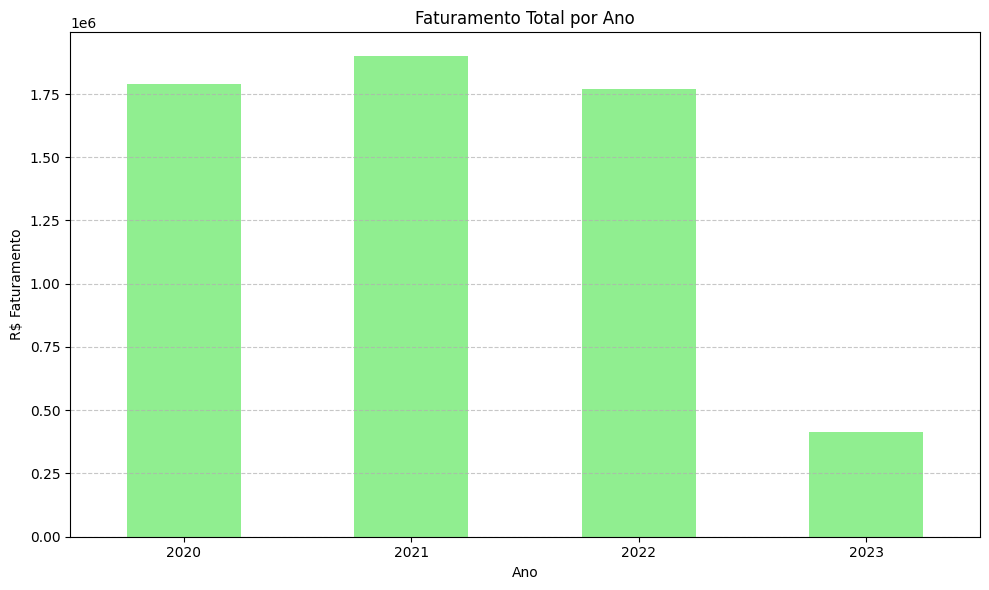

In [ ]:
import matplotlib.pyplot as plt

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
faturamento_anual.plot(kind='bar', color='lightgreen')

plt.title('Faturamento Total por Ano')
plt.xlabel('Ano')
plt.ylabel('R$ Faturamento')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-5-e8523ba55133>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_anual, x='Ano', y='Preço', palette='viridis')


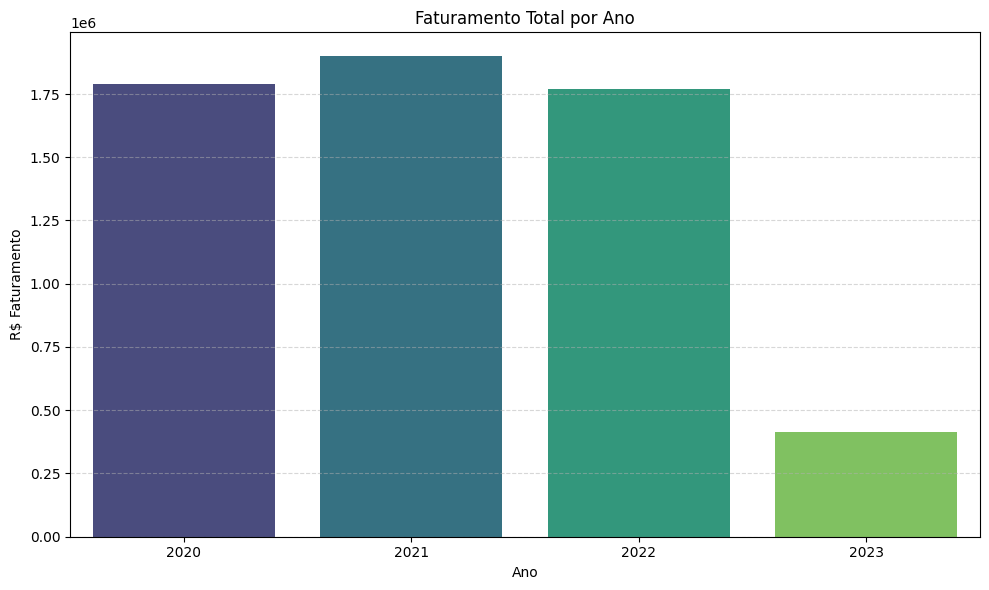

In [ ]:
import seaborn as sns

# Resetando índice para usar com seaborn
df_anual = faturamento_anual.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_anual, x='Ano', y='Preço', palette='viridis')

plt.title('Faturamento Total por Ano')
plt.xlabel('Ano')
plt.ylabel('R$ Faturamento')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# prompt: calcular o faturamento de cada loja , loja2 , loja3, loja4

# Calculando o faturamento de cada loja individualmente
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

print(f"Faturamento da Loja 1: R${faturamento_loja1:.2f}")
print(f"Faturamento da Loja 2: R${faturamento_loja2:.2f}")
print(f"Faturamento da Loja 3: R${faturamento_loja3:.2f}")
print(f"Faturamento da Loja 4: R${faturamento_loja4:.2f}")



Faturamento da Loja 1: R$1534509.12
Faturamento da Loja 2: R$1488459.06
Faturamento da Loja 3: R$1464025.03
Faturamento da Loja 4: R$1384497.58


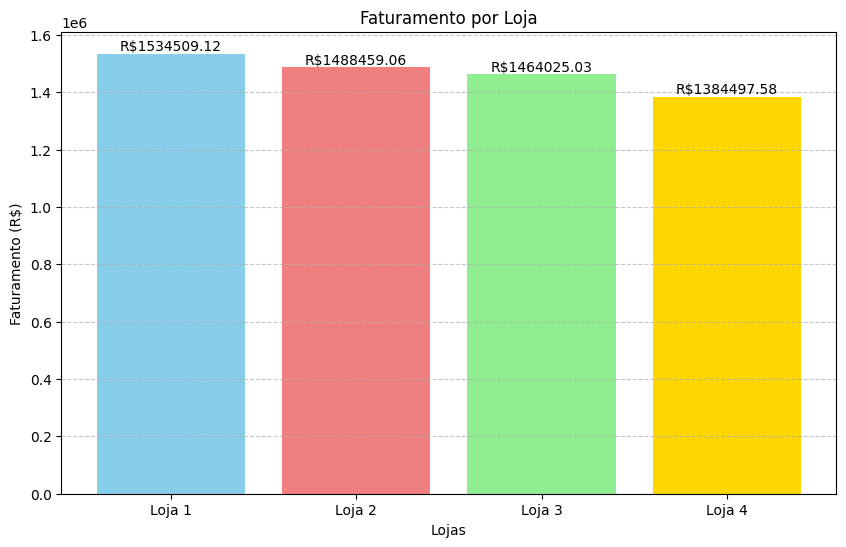

In [ ]:


import matplotlib.pyplot as plt

# Dados de faturamento (substitua pelos valores reais)
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(lojas, faturamentos, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Faturamento por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando rótulos de valor acima de cada barra
for i, v in enumerate(faturamentos):
    plt.text(i, v, f'R${v:.2f}', ha='center', va='bottom')

plt.show()


# 2. Vendas por Categoria


In [ ]:
# Agrupa por categoria e calcula a média da avaliação
media_categoria = lojas.groupby("Categoria do Produto")["Avaliação da compra"].mean().reset_index()

# Renomeia a coluna
media_categoria.columns = ["Categoria do Produto", "Média da Avaliação"]

# Ordena do maior para o menor
media_categoria = media_categoria.sort_values(by="Média da Avaliação", ascending=False)

# Exibe
print(media_categoria)

    Categoria do Produto  Média da Avaliação
0             brinquedos            4.070543
6                 moveis            4.033934
1       eletrodomesticos            4.014795
5                 livros            4.004043
4  instrumentos musicais            4.003984
2            eletronicos            3.992664
3        esporte e lazer            3.988320
7  utilidades domesticas            3.979452


<ipython-input-21-a66177888896>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


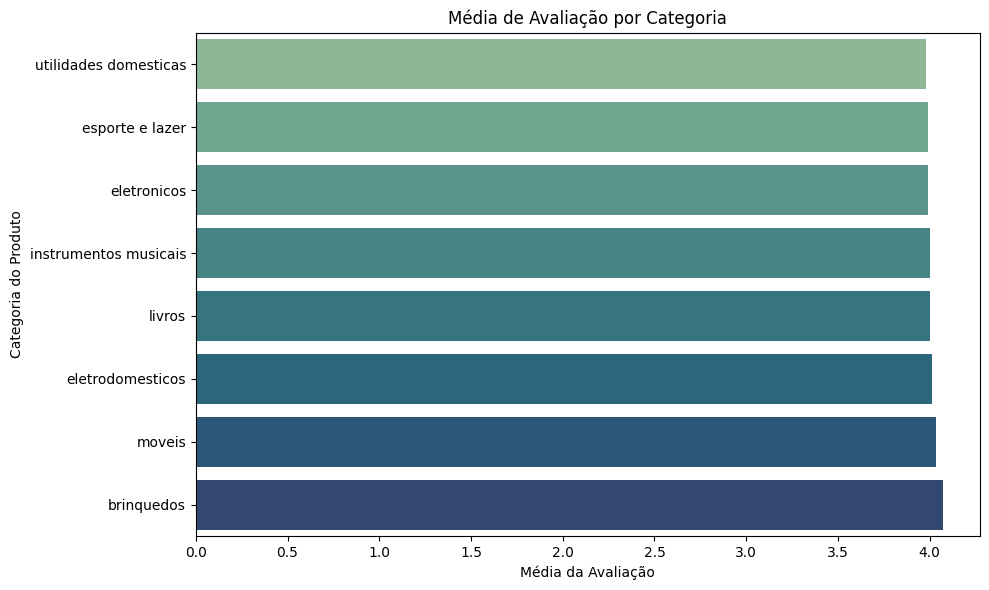

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a média de avaliação por categoria
media_categoria = lojas.groupby("Categoria do Produto")["Avaliação da compra"].mean().reset_index()
media_categoria.columns = ["Categoria do Produto", "Média da Avaliação"]
media_categoria = media_categoria.sort_values(by="Média da Avaliação", ascending=True)

# Criar o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    data=media_categoria,
    x="Média da Avaliação",
    y="Categoria do Produto",
    palette="crest"
)

plt.title("Média de Avaliação por Categoria")
plt.xlabel("Média da Avaliação")
plt.ylabel("Categoria do Produto")
plt.tight_layout()
plt.show()



# 3. Média de Avaliação das Lojas

In [ ]:
#LOJA1

# Calcula a média geral da avaliação
media_geral = loja["Avaliação da compra"].mean()

print(f"Média geral de avaliação da Loja 1: {media_geral:.2f}")


Média geral de avaliação da Loja 1: 3.98


In [ ]:
#LOJA2

# Calcula a média geral da avaliação
media_geral = loja2["Avaliação da compra"].mean()

print(f"Média geral de avaliação da Loja 2: {media_geral:.2f}")

Média geral de avaliação da Loja 2: 4.04


In [ ]:
#LOJA3

# Calcula a média geral da avaliação
media_geral = loja3["Avaliação da compra"].mean()

print(f"Média geral de avaliação da Loja 3: {media_geral:.2f}")

Média geral de avaliação da Loja 3: 4.05


In [ ]:
#LOJA4

# Calcula a média geral da avaliação
media_geral = loja4["Avaliação da compra"].mean()

print(f"Média geral de avaliação da Loja 4: {media_geral:.2f}")

Média geral de avaliação da Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [ ]:
#de todas as lojas

# Conta quantas vezes cada produto foi vendido
vendas_por_produto = lojas["Produto"].value_counts().reset_index()
vendas_por_produto.columns = ["Produto", "Quantidade de Vendas"]

# Exibe os 10 mais vendidos
print("------------TODAS AS LOJAS-------------")
print("🔝 Top 10 produtos mais vendidos:")
print(vendas_por_produto.head(10))

# Exibe os 10 menos vendidos
print("\n🔻 Top 10 produtos menos vendidos:")
print(vendas_por_produto.tail(10))

------------TODAS AS LOJAS-------------
🔝 Top 10 produtos mais vendidos:
                    Produto  Quantidade de Vendas
0                    Cômoda                   210
1  Carrinho controle remoto                   206
2               Micro-ondas                   206
3                   Bateria                   203
4                 Cama king                   201
5        Secadora de roupas                   200
6       Modelagem preditiva                   200
7           Jogo de panelas                   200
8                  Cama box                   199
9          Blocos de montar                   199

🔻 Top 10 produtos menos vendidos:
                        Produto  Quantidade de Vendas
41            Panela de pressão                   172
42                   Smartwatch                   172
43                Jogo de copos                   169
44                     Poltrona                   168
45           Assistente virtual                   167
46  Ciência de dad

In [ ]:
#loja1

# Conta quantas vezes cada produto foi vendido
vendas_por_produto = loja["Produto"].value_counts().reset_index()
vendas_por_produto.columns = ["Produto", "Quantidade de Vendas"]

# Exibe os 10 mais vendidos
print("------------LOJA 1-------------")
print("🔝 Top 10 produtos mais vendidos:")
print(vendas_por_produto.head(10))

# Exibe os 10 menos vendidos
print("\n🔻 Top 10 produtos menos vendidos:")
print(vendas_por_produto.tail(10))

------------LOJA 1-------------
🔝 Top 10 produtos mais vendidos:
              Produto  Quantidade de Vendas
0         Micro-ondas                    60
1       TV Led UHD 4K                    60
2       Guarda roupas                    60
3  Secadora de roupas                    58
4              Cômoda                    56
5    Blocos de montar                    56
6    Bola de basquete                    55
7           Bicicleta                    54
8        Copo térmico                    54
9           Geladeira                    54

🔻 Top 10 produtos menos vendidos:
                        Produto  Quantidade de Vendas
41                  Boneca bebê                    40
42               Mesa de jantar                    40
43               Dinossauro Rex                    40
44               Corda de pular                    40
45                      Mochila                    39
46  Ciência de dados com python                    39
47                     Pandeiro       

In [ ]:
#loja2

# Conta quantas vezes cada produto foi vendido
vendas_por_produto = loja2["Produto"].value_counts().reset_index()
vendas_por_produto.columns = ["Produto", "Quantidade de Vendas"]

# Exibe os 10 mais vendidos
print("------------LOJA 2-------------")
print("🔝 Top 10 produtos mais vendidos:")
print(vendas_por_produto.head(10))

# Exibe os 10 menos vendidos
print("\n🔻 Top 10 produtos menos vendidos:")
print(vendas_por_produto.tail(10))

------------LOJA 2-------------
🔝 Top 10 produtos mais vendidos:
                    Produto  Quantidade de Vendas
0  Iniciando em programação                    65
1               Micro-ondas                    62
2                   Bateria                    61
3                    Violão                    58
4                  Pandeiro                    58
5        Secadora de roupas                    57
6          Celular Plus X42                    55
7          Blocos de montar                    54
8             Guarda roupas                    54
9           Jogo de panelas                    52

🔻 Top 10 produtos menos vendidos:
               Produto  Quantidade de Vendas
41      Dinossauro Rex                    42
42        Celular ABXY                    41
43            Smart TV                    40
44            Faqueiro                    39
45  Assistente virtual                    38
46      Fone de ouvido                    37
47            Poltrona             

In [ ]:
#loja3

# Conta quantas vezes cada produto foi vendido
vendas_por_produto = loja3["Produto"].value_counts().reset_index()
vendas_por_produto.columns = ["Produto", "Quantidade de Vendas"]

# Exibe os 10 mais vendidos
print("------------LOJA 3-------------")
print("🔝 Top 10 produtos mais vendidos:")
print(vendas_por_produto.head(10))

# Exibe os 10 menos vendidos
print("\n🔻 Top 10 produtos menos vendidos:")
print(vendas_por_produto.tail(10))

------------LOJA 3-------------
🔝 Top 10 produtos mais vendidos:
                    Produto  Quantidade de Vendas
0             Kit banquetas                    57
1            Mesa de jantar                    56
2                 Cama king                    56
3           Jogo de panelas                    55
4                    Cômoda                    55
5                  Smart TV                    54
6                     Fogão                    53
7            Corda de pular                    53
8       Modelagem preditiva                    53
9  Carrinho controle remoto                    52

🔻 Top 10 produtos menos vendidos:
               Produto  Quantidade de Vendas
41            Faqueiro                    39
42         Boneca bebê                    39
43             Headset                    39
44  Assistente virtual                    39
45        Copo térmico                    38
46            Guitarra                    38
47       Jogo de copos             

In [ ]:
#loja4

# Conta quantas vezes cada produto foi vendido
vendas_por_produto = loja4["Produto"].value_counts().reset_index()
vendas_por_produto.columns = ["Produto", "Quantidade de Vendas"]

# Exibe os 10 mais vendidos
print("------------LOJA 4-------------")
print("🔝 Top 10 produtos mais vendidos:")
print(vendas_por_produto.head(10))

# Exibe os 10 menos vendidos
print("\n🔻 Top 10 produtos menos vendidos:")
print(vendas_por_produto.tail(10))

------------LOJA 4-------------
🔝 Top 10 produtos mais vendidos:
                    Produto  Quantidade de Vendas
0                  Cama box                    62
1                  Faqueiro                    59
2   Dashboards com Power BI                    56
3                 Cama king                    56
4  Carrinho controle remoto                    55
5            Mesa de jantar                    55
6                    Cômoda                    55
7                  Smart TV                    54
8          Blocos de montar                    54
9                  Pandeiro                    52

🔻 Top 10 produtos menos vendidos:
                        Produto  Quantidade de Vendas
41        Cadeira de escritório                    40
42                 Celular ABXY                    39
43            Xadrez de madeira                    39
44                   Smartwatch                    39
45           Lavadora de roupas                    38
46                    Gela

# 5. Frete Médio por Loja


In [ ]:
#TODAS AS LOJAS
# Calcula a média do frete
media_frete = lojas["Frete"].mean()
print("-------------TODAS AS LOJAS----------------")
print(f"Média do valor do frete: R$ {media_frete:.2f}")

-------------TODAS AS LOJAS----------------
Média do valor do frete: R$ 33.17


In [ ]:
# LOJA1
# Calcula a média do frete
media_frete = loja["Frete"].mean()
print("-------------TODAS AS LOJA 1----------------")
print(f"Média do valor do frete: R$ {media_frete:.2f}")

-------------TODAS AS LOJA 1----------------
Média do valor do frete: R$ 34.69


In [ ]:
# LOJA2
# Calcula a média do frete
media_frete = loja2["Frete"].mean()
print("-------------TODAS AS LOJA 2----------------")
print(f"Média do valor do frete: R$ {media_frete:.2f}")

-------------TODAS AS LOJA 2----------------
Média do valor do frete: R$ 33.62


In [ ]:
# LOJA3
# Calcula a média do frete
media_frete = loja3["Frete"].mean()
print("-------------TODAS AS LOJA 3----------------")
print(f"Média do valor do frete: R$ {media_frete:.2f}")

-------------TODAS AS LOJA 3----------------
Média do valor do frete: R$ 33.07


In [ ]:
# LOJA4
# Calcula a média do frete
media_frete = loja4["Frete"].mean()
print("-------------TODAS AS LOJA 4----------------")
print(f"Média do valor do frete: R$ {media_frete:.2f}")

-------------TODAS AS LOJA 4----------------
Média do valor do frete: R$ 31.28
